# Students placement dataset EDA

In [117]:
import pandas as pd

df = pd.read_csv("data.csv")

In [118]:
df.head(10)

,name,city,gender,profession,age,cgpa,placed
0,moriarity,NaN,female,phd,28.0,5.94,1
1,moriarity,asgard,NaN,bachelor,50.0,8.55,0
2,holmes,NaN,female,masters,18.0,5.56,0
3,sam,NaN,male,bachelor,25.0,8.57,1
4,sam,NaN,male,bachelor,19.0,8.76,1
5,bobby,purgatory,male,bachelor,20.0,7.68,0
6,NaN,wakanda,male,NaN,20.0,9.01,0
7,NaN,wakanda,male,bachelor,20.0,8.31,0
8,moriarity,asgard,female,NaN,19.0,7.20,0
9,castiel,NaN,female,masters,NaN,8.35,1


In [119]:
df['name'].fillna('unknown', inplace=True)

C:\Users\danii\AppData\Local\Temp\ipykernel_3528\1146368269.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna('unknown', inplace=True)


In [120]:
df['name'].isna().sum()

np.int64(0)

In [121]:
df.describe(include='all')

,name,city,gender,profession,age,cgpa,placed
count,1100,905,994,921,982.000000,962.000000,1100.000000
unique,9,4,2,3,NaN,NaN,NaN
top,moriarity,wakanda,male,bachelor,NaN,NaN,NaN
freq,280,391,760,517,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,28.429735,7.609033,0.499091
std,NaN,NaN,NaN,NaN,9.141244,1.495991,0.500227
min,NaN,NaN,NaN,NaN,18.000000,4.010000,0.000000
25%,NaN,NaN,NaN,NaN,22.000000,7.170000,0.000000
50%,NaN,NaN,NaN,NaN,26.000000,7.925000,0.000000
75%,NaN,NaN,NaN,NaN,30.000000,8.760000,1.000000


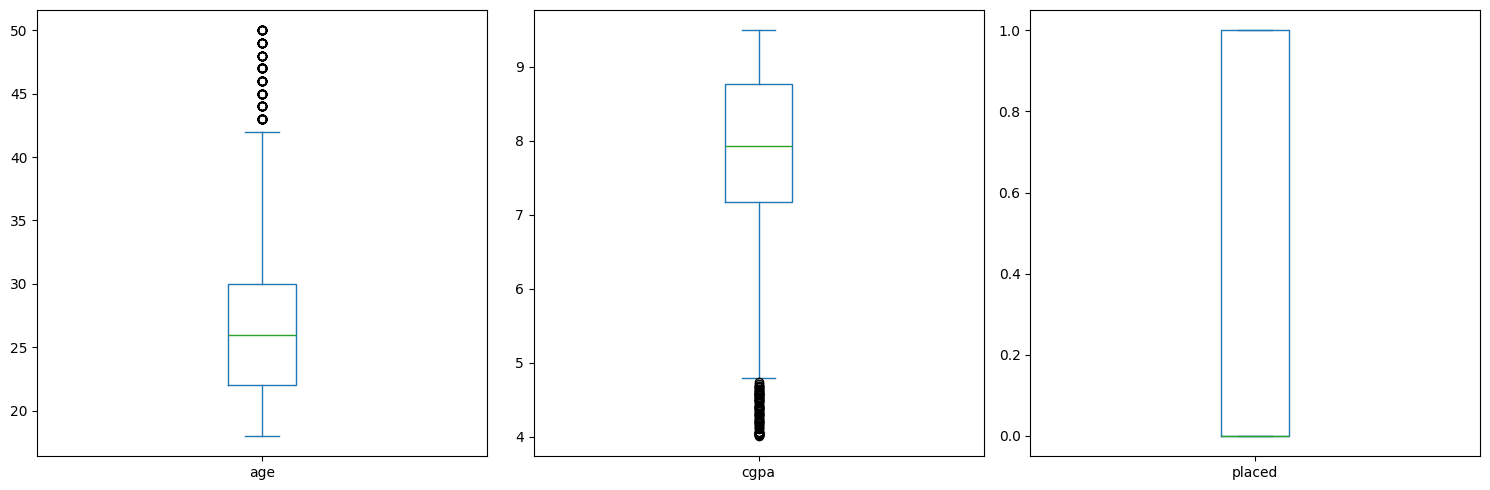

In [122]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols].plot(kind='box', subplots=True, layout=(1, len(numeric_cols)), figsize=(5 * len(numeric_cols), 5), sharey=False)
plt.tight_layout()
plt.show()


In [123]:
df['age'] = df['age'].fillna(0)
df['age'] = df['age'].clip(lower=20, upper=35)

In [124]:
df.describe(include='all')

,name,city,gender,profession,age,cgpa,placed
count,1100,905,994,921,1100.000000,962.000000,1100.000000
unique,9,4,2,3,NaN,NaN,NaN
top,moriarity,wakanda,male,bachelor,NaN,NaN,NaN
freq,280,391,760,517,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,25.855455,7.609033,0.499091
std,NaN,NaN,NaN,NaN,5.368836,1.495991,0.500227
min,NaN,NaN,NaN,NaN,20.000000,4.010000,0.000000
25%,NaN,NaN,NaN,NaN,20.000000,7.170000,0.000000
50%,NaN,NaN,NaN,NaN,25.000000,7.925000,0.000000
75%,NaN,NaN,NaN,NaN,29.000000,8.760000,1.000000


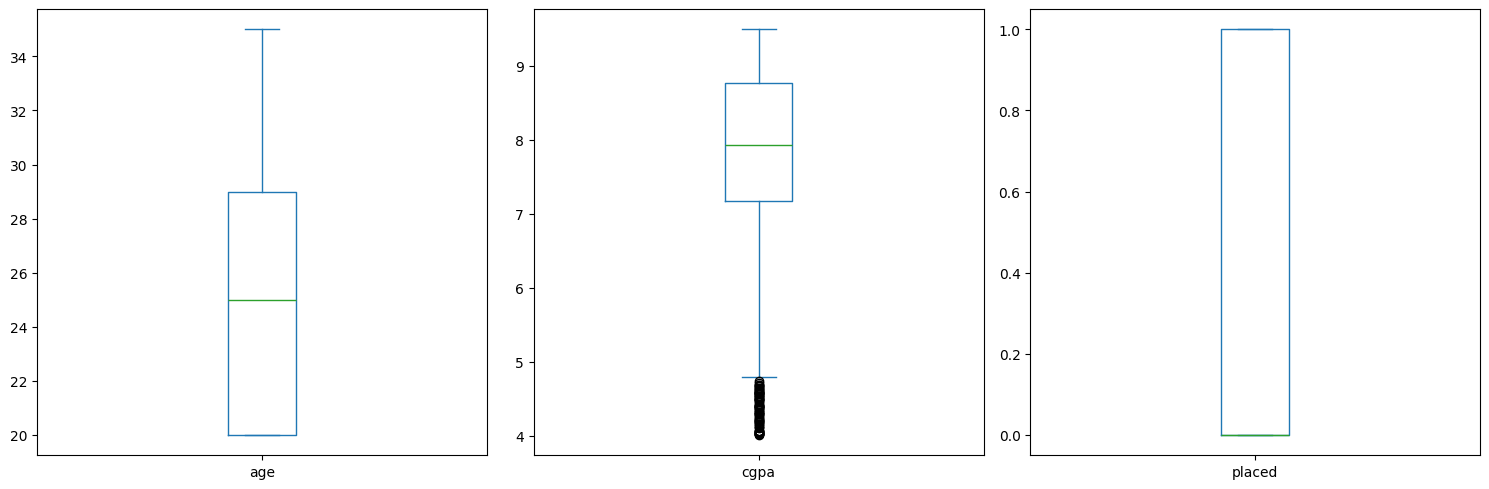

In [125]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols].plot(kind='box', subplots=True, layout=(1, len(numeric_cols)), figsize=(5 * len(numeric_cols), 5), sharey=False)
plt.tight_layout()
plt.show()

In [126]:
# df['cgpa'] = df['cgpa'].clip(lower=5, upper=9)


In [127]:
# numeric_cols = df.select_dtypes(include='number').columns
# df[numeric_cols].plot(kind='box', subplots=True, layout=(1, len(numeric_cols)), figsize=(5 * len(numeric_cols), 5), sharey=False)
# plt.tight_layout()
# plt.show()

In [128]:
# df.describe(include='all')

In [129]:
df['age'].isna().sum()

np.int64(0)

In [ ]:
print(df.isna().sum())


name            0
city          195
gender        106
profession    179
age             0
cgpa          138
placed          0
dtype: int64


In [132]:
df['city'].fillna('unknown', inplace=True)
df['city'].isna().sum()

np.int64(0)

In [133]:
df['gender'].fillna('unknown', inplace=True)
df['gender'].isna().sum()

C:\Users\danii\AppData\Local\Temp\ipykernel_3528\216788189.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].fillna('unknown', inplace=True)


np.int64(0)

In [134]:
df['profession'].fillna('unknown', inplace=True)
df['profession'].isna().sum()

C:\Users\danii\AppData\Local\Temp\ipykernel_3528\764807980.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['profession'].fillna('unknown', inplace=True)


np.int64(0)

In [135]:
print(df.isna().sum())

name            0
city            0
gender          0
profession      0
age             0
cgpa          138
placed          0
dtype: int64


In [136]:
df['cgpa'] = df['cgpa'].fillna(0)

In [137]:
print(df.isna().sum())

name          0
city          0
gender        0
profession    0
age           0
cgpa          0
placed        0
dtype: int64


In [138]:
df.describe(include='all')

,name,city,gender,profession,age,cgpa,placed
count,1100,1100,1100,1100,1100.000000,1100.000000,1100.000000
unique,9,5,3,4,NaN,NaN,NaN
top,moriarity,wakanda,male,bachelor,NaN,NaN,NaN
freq,280,391,760,517,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,25.855455,6.654445,0.499091
std,NaN,NaN,NaN,NaN,5.368836,2.883574,0.500227
min,NaN,NaN,NaN,NaN,20.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,20.000000,5.465000,0.000000
50%,NaN,NaN,NaN,NaN,25.000000,7.730000,0.000000
75%,NaN,NaN,NaN,NaN,29.000000,8.640000,1.000000
